In [682]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing


import warnings
warnings.filterwarnings('ignore')

In [683]:
df = pd.read_csv('data_problem_1.csv')

In [684]:
df.shape
#shape of data

(237373, 7)

In [685]:
df.head(10)

,order_id,R_Lon,R_Lat,C_Lon,C_Lat,order_pickedup_time,order_delivered_time
0,PRD_ZMT_2960011,77.063728,28.468983,77.071230,28.449929,2016-04-23 09:30:20,2016-04-23 09:57:04
1,PRD_ZMT_2964555,77.063728,28.468983,77.066637,28.454522,2016-04-23 11:05:32,2016-04-23 11:27:10
2,PRD_ZMT_2968945,77.063728,28.468983,77.067590,28.461570,2016-04-23 14:49:07,2016-04-23 15:07:18
3,PRD_ZMT_2976663,77.063728,28.468983,77.058401,28.455738,2016-04-23 16:43:14,2016-04-23 17:16:12
4,PRD_ZMT_2985948,77.063728,28.468983,77.083967,28.440068,2016-04-24 07:54:14,2016-04-24 08:16:29
5,PRD_ZMT_2990196,77.081712,28.466960,77.107043,28.442475,2016-04-24 08:57:31,2016-04-24 09:13:31
6,PRD_ZMT_2998231,77.063728,28.468983,77.064323,28.457730,2016-04-24 13:49:27,2016-04-24 14:03:24
7,PRD_ZMT_3001394,77.063728,28.468983,77.081893,28.466735,2016-04-24 15:00:08,2016-04-24 15:27:24
8,PRD_ZMT_3007435,77.119861,28.647640,77.123969,28.641992,2016-04-24 16:02:38,2016-04-24 16:20:15
9,PRD_ZMT_3016000,77.228264,28.573615,77.247127,28.561154,2016-04-25 08:16:25,2016-04-25 08:25:13


In [686]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237373 entries, 0 to 237372
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              237373 non-null  object 
 1   R_Lon                 237373 non-null  float64
 2   R_Lat                 237373 non-null  float64
 3   C_Lon                 237373 non-null  float64
 4   C_Lat                 237373 non-null  float64
 5   order_pickedup_time   237373 non-null  object 
 6   order_delivered_time  237373 non-null  object 
dtypes: float64(4), object(3)
memory usage: 12.7+ MB


In [687]:
df['order_pickedup_time'] = pd.to_datetime(df['order_pickedup_time'], infer_datetime_format = True)

In [688]:
df['order_delivered_time'] = pd.to_datetime(df['order_delivered_time'],  infer_datetime_format = True)

In [689]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237373 entries, 0 to 237372
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   order_id              237373 non-null  object        
 1   R_Lon                 237373 non-null  float64       
 2   R_Lat                 237373 non-null  float64       
 3   C_Lon                 237373 non-null  float64       
 4   C_Lat                 237373 non-null  float64       
 5   order_pickedup_time   237373 non-null  datetime64[ns]
 6   order_delivered_time  237373 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(4), object(1)
memory usage: 12.7+ MB


In [690]:
df.nunique()

order_id                237373
R_Lon                     1411
R_Lat                     1413
C_Lon                   159334
C_Lat                   160674
order_pickedup_time     226217
order_delivered_time    231202
dtype: int64

In [691]:
#cannot do value_counts as there are too many unique values

In [692]:
#extract just the date

In [693]:
# Extract just the date
df['order_pickedup_date'] = pd.to_datetime(df['order_pickedup_time'].dt.date)
df['order_delivered_date'] = pd.to_datetime(df['order_delivered_time'].dt.date)

In [694]:
df.nunique()

order_id                237373
R_Lon                     1411
R_Lat                     1413
C_Lon                   159334
C_Lat                   160674
order_pickedup_time     226217
order_delivered_time    231202
order_pickedup_date        158
order_delivered_date       159
dtype: int64

In [695]:
#Missing value detection : None
df.isna().sum()

order_id                0
R_Lon                   0
R_Lat                   0
C_Lon                   0
C_Lat                   0
order_pickedup_time     0
order_delivered_time    0
order_pickedup_date     0
order_delivered_date    0
dtype: int64

In [696]:
df.describe()

,R_Lon,R_Lat,C_Lon,C_Lat,order_pickedup_time,order_delivered_time,order_pickedup_date,order_delivered_date
count,237373.000000,237373.000000,237373.000000,237373.000000,237373,237373,237373,237373
mean,78.976819,20.595245,78.975780,20.594219,2016-07-15 03:13:38.148243968,2016-07-15 03:32:25.481280768,2016-07-14 14:45:05.281561600,2016-07-14 14:45:39.132083200
min,12.934216,12.875971,2.295038,9.394837,2016-04-19 06:54:27,2016-04-19 07:15:27,2016-04-19 00:00:00,2016-04-19 00:00:00
25%,77.199208,17.400000,77.202206,17.397975,2016-06-11 15:27:52,2016-06-11 15:46:19,2016-06-11 00:00:00,2016-06-11 00:00:00
50%,78.358395,17.468478,78.354377,17.468799,2016-07-16 15:03:46,2016-07-16 15:21:09,2016-07-16 00:00:00,2016-07-16 00:00:00
75%,78.462361,28.468983,78.462728,28.465918,2016-08-20 14:15:08,2016-08-20 14:32:04,2016-08-20 00:00:00,2016-08-20 00:00:00
max,88.433560,28.671119,91.765675,48.858871,2016-09-25 17:47:30,2016-09-25 18:05:20,2016-09-25 00:00:00,2016-09-25 00:00:00
std,3.421235,6.204799,3.432772,6.205044,NaN,NaN,NaN,NaN


In [697]:
df['order_pickedup_date'].value_counts()

order_pickedup_date
2016-08-28    2782
2016-08-21    2508
2016-06-26    2491
2016-08-27    2463
2016-08-06    2344
              ... 
2016-04-24      52
2016-04-22      35
2016-04-21       7
2016-04-19       4
2016-04-20       3
Name: count, Length: 158, dtype: int64

In [698]:
df['order_pickedup_date'].nunique()

158

In [699]:
#Univariate analysis and bivaraite analsis is done after aggregation and feature engineering of the data.
#Otherwse we end up with false / erronous graphical analysis


In [700]:
#Feature Engineering


In [701]:
#Calculate the haversine distance between R and C points in kms 

In [702]:
from haversine import haversine, Unit

# Calculate distance using Haversine formula. 
#Haversine expects individual 
df['dist'] = [haversine((lat1, lon1), (lat2, lon2), unit=Unit.KILOMETERS)
              for lat1, lon1, lat2, lon2 in zip(df['R_Lat'], df['R_Lon'], df['C_Lat'], df['C_Lon'])]


In [703]:
df['dist'].describe()

count    237373.000000
mean          1.894882
std          34.995237
min           0.000000
25%           0.664449
50%           1.374803
75%           2.179802
max        7329.490678
Name: dist, dtype: float64

In [704]:
df['dist'].value_counts()

dist
0.000000    5357
5.579045      40
1.261456      30
0.053263      29
1.081291      27
            ... 
2.158283       1
1.499301       1
2.241152       1
3.225191       1
1.561440       1
Name: count, Length: 226659, dtype: int64

In [705]:
# Calculate difference in minutes
df['diff'] = (df['order_delivered_time'] - df['order_pickedup_time']).dt.total_seconds() / 60

In [706]:
df['diff'].describe()

count    237373.000000
mean         18.788884
std          33.646459
min           0.000000
25%          10.500000
50%          16.633333
75%          23.950000
max        9489.883333
Name: diff, dtype: float64

In [707]:
df['diff'].value_counts()

diff
0.000000     7138
0.016667     2332
0.033333      874
0.300000      675
0.316667      577
             ... 
60.183333       1
60.133333       1
90.950000       1
75.250000       1
62.666667       1
Name: count, Length: 5288, dtype: int64

In [708]:
# Extract the time part and convert it into 24-hour format

df['order_pick_hour'] =df['order_pickedup_time'].dt.hour


In [709]:
df['order_pick_hour']

0          9
1         11
2         14
3         16
4          7
          ..
237368    16
237369    17
237370    17
237371    17
237372    17
Name: order_pick_hour, Length: 237373, dtype: int32

<Axes: xlabel='order_pick_hour', ylabel='count'>

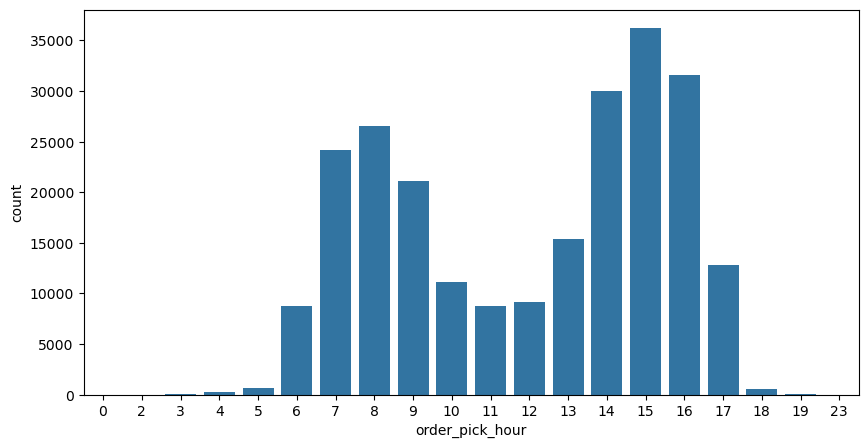

In [710]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x= 'order_pick_hour', data = df, ax= ax)

In [711]:
# Define function to categorize time of the day
def categorize_time(time):
    hour = time.hour
    if 6 <= hour < 9:  # Morning: 5AM to 11:30AM
        return 'Morning'
    elif 10 <= hour < 13:  # Afternoon: 11:30AM to 4PM
        return 'Afternoon'
    elif 13 <= hour < 17:  # Evening: 4PM to 7:30PM
        return 'Evening'
    else:  # Night: 7:30PM to 5AM
        return 'Night'


In [712]:
# Apply function to categorize time of the day
df['time_of_day_code'] = df['order_pickedup_time'].apply(categorize_time)

In [713]:
df['time_of_day_code'].value_counts()

time_of_day_code
Evening      113255
Morning       59529
Night         35456
Afternoon     29133
Name: count, dtype: int64

In [714]:
df.head()

,order_id,R_Lon,R_Lat,C_Lon,C_Lat,order_pickedup_time,order_delivered_time,order_pickedup_date,order_delivered_date,dist,diff,order_pick_hour,time_of_day_code
0,PRD_ZMT_2960011,77.063728,28.468983,77.071230,28.449929,2016-04-23 09:30:20,2016-04-23 09:57:04,2016-04-23,2016-04-23,2.242048,26.733333,9,Night
1,PRD_ZMT_2964555,77.063728,28.468983,77.066637,28.454522,2016-04-23 11:05:32,2016-04-23 11:27:10,2016-04-23,2016-04-23,1.632944,21.633333,11,Afternoon
2,PRD_ZMT_2968945,77.063728,28.468983,77.067590,28.461570,2016-04-23 14:49:07,2016-04-23 15:07:18,2016-04-23,2016-04-23,0.906627,18.183333,14,Evening
3,PRD_ZMT_2976663,77.063728,28.468983,77.058401,28.455738,2016-04-23 16:43:14,2016-04-23 17:16:12,2016-04-23,2016-04-23,1.562129,32.966667,16,Evening
4,PRD_ZMT_2985948,77.063728,28.468983,77.083967,28.440068,2016-04-24 07:54:14,2016-04-24 08:16:29,2016-04-24,2016-04-24,3.775241,22.250000,7,Morning


In [715]:
df['dist'] = df['dist'].round(2)

In [716]:
df['diff'] = df['diff'].round(2)

In [717]:
df.describe()

,R_Lon,R_Lat,C_Lon,C_Lat,order_pickedup_time,order_delivered_time,order_pickedup_date,order_delivered_date,dist,diff,order_pick_hour
count,237373.000000,237373.000000,237373.000000,237373.000000,237373,237373,237373,237373,237373.000000,237373.000000,237373.000000
mean,78.976819,20.595245,78.975780,20.594219,2016-07-15 03:13:38.148243968,2016-07-15 03:32:25.481280768,2016-07-14 14:45:05.281561600,2016-07-14 14:45:39.132083200,1.894896,18.788910,11.979922
min,12.934216,12.875971,2.295038,9.394837,2016-04-19 06:54:27,2016-04-19 07:15:27,2016-04-19 00:00:00,2016-04-19 00:00:00,0.000000,0.000000,0.000000
25%,77.199208,17.400000,77.202206,17.397975,2016-06-11 15:27:52,2016-06-11 15:46:19,2016-06-11 00:00:00,2016-06-11 00:00:00,0.660000,10.500000,8.000000
50%,78.358395,17.468478,78.354377,17.468799,2016-07-16 15:03:46,2016-07-16 15:21:09,2016-07-16 00:00:00,2016-07-16 00:00:00,1.370000,16.630000,13.000000
75%,78.462361,28.468983,78.462728,28.465918,2016-08-20 14:15:08,2016-08-20 14:32:04,2016-08-20 00:00:00,2016-08-20 00:00:00,2.180000,23.950000,15.000000
max,88.433560,28.671119,91.765675,48.858871,2016-09-25 17:47:30,2016-09-25 18:05:20,2016-09-25 00:00:00,2016-09-25 00:00:00,7329.490000,9489.880000,23.000000
std,3.421235,6.204799,3.432772,6.205044,NaN,NaN,NaN,NaN,34.995234,33.646446,3.528053


In [718]:
#EDA and then continue feature engineering based on latitude and longitude 

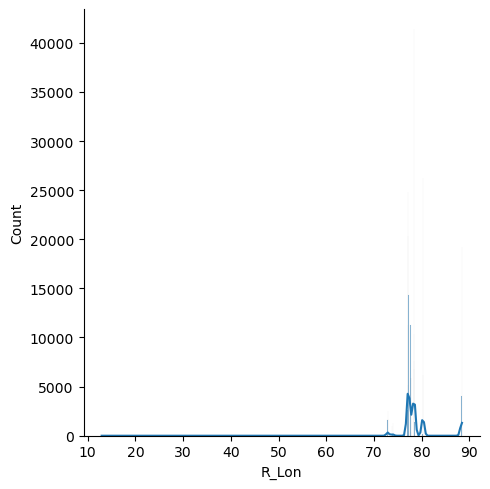

In [719]:
sns.displot( x = 'R_Lon', data = df, kde = True)

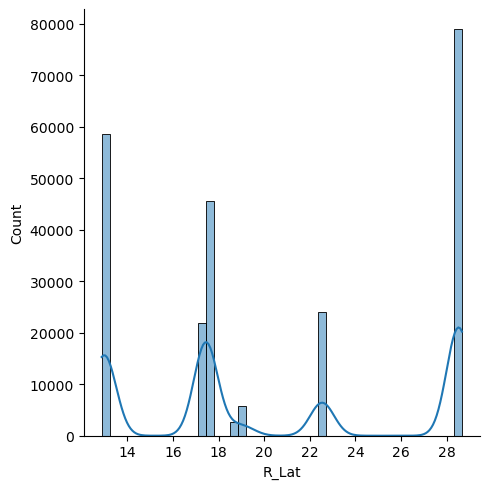

In [720]:
sns.displot( x = 'R_Lat', data = df, kde = True)

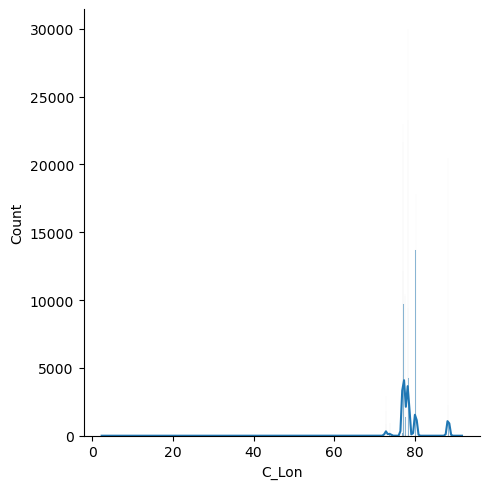

In [721]:
sns.displot( x = 'C_Lon', data = df, kde = True)

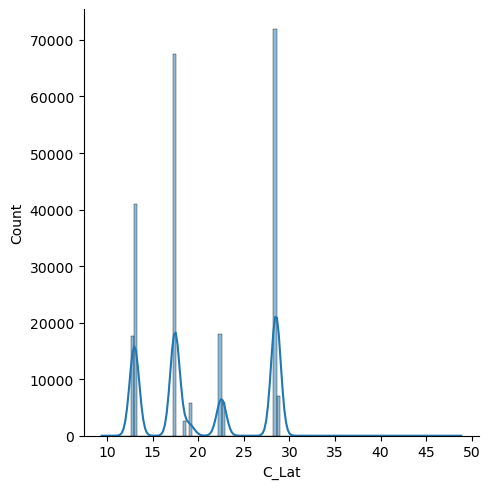

In [722]:
sns.displot( x = 'C_Lat', data = df, kde = True)

<Axes: xlabel='dist'>

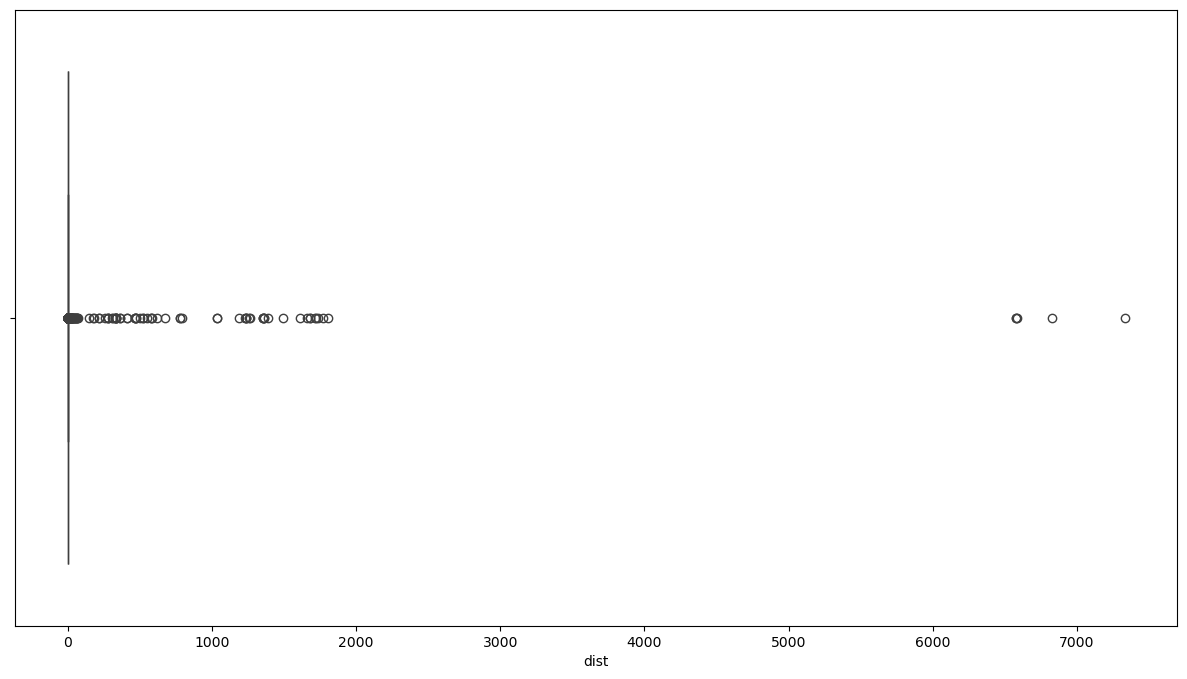

In [723]:
from matplotlib import pyplot
fig, ax = pyplot.subplots(figsize=(15,8))
sns.boxplot(x=df['dist'], ax=ax)

In [724]:
#distance requires outlier treatment 

<Axes: xlabel='diff'>

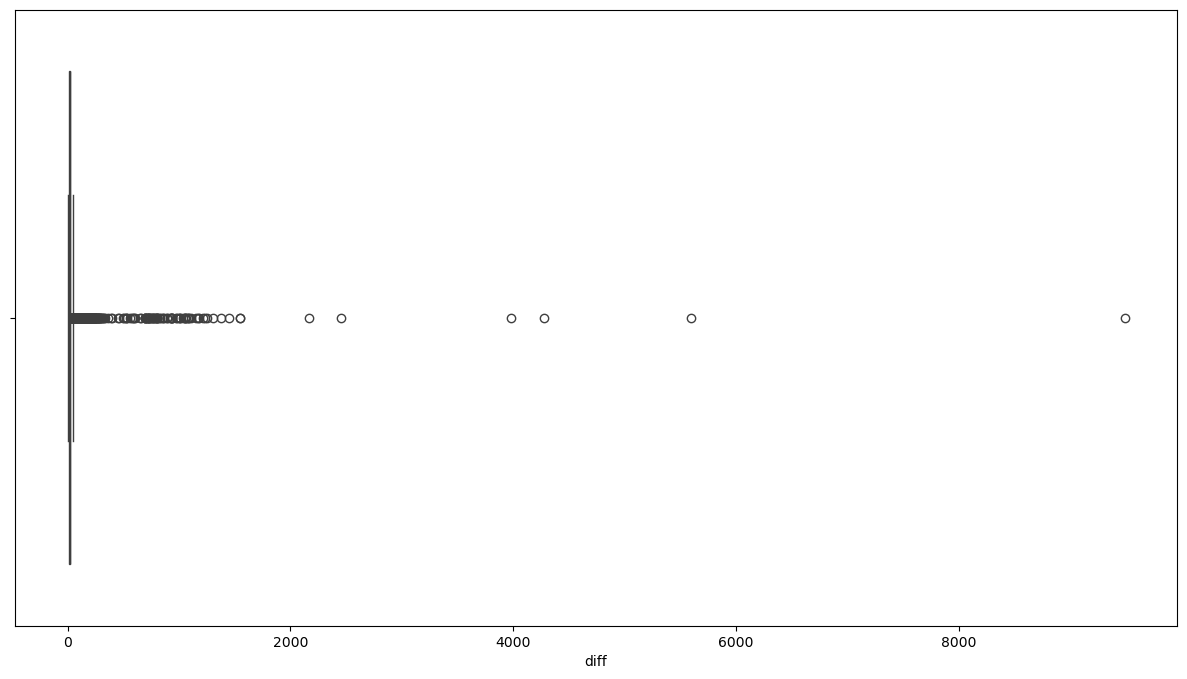

In [725]:
from matplotlib import pyplot
fig, ax = pyplot.subplots(figsize=(15,8))
sns.boxplot(x=df['diff'], ax=ax)

In [726]:
#difference also requires outlier treatment

In [727]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

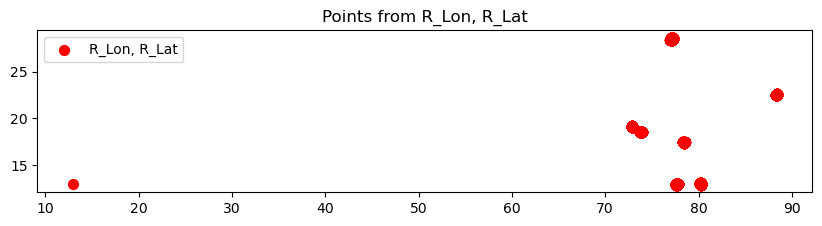

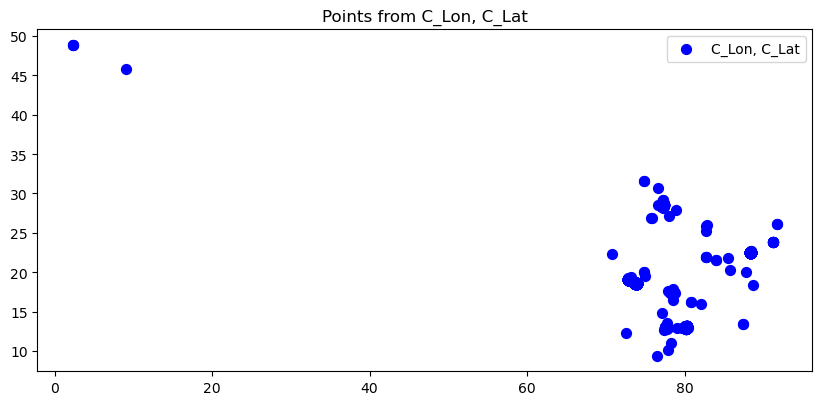

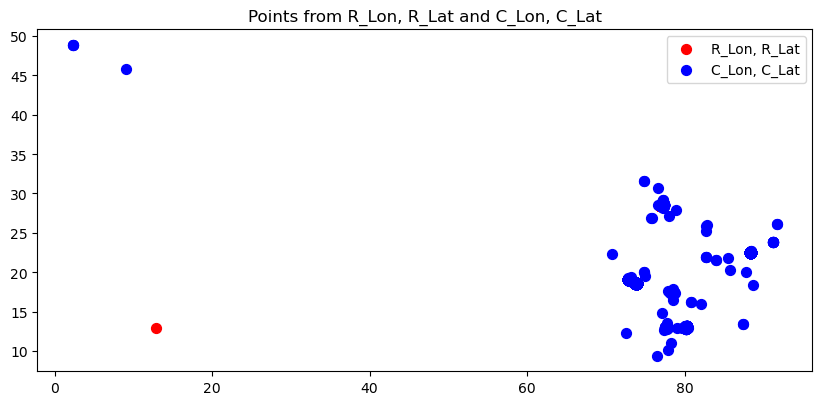

In [728]:
# Create GeoDataFrame for R_Lon, R_Lat
geometry_R = [Point(xy) for xy in zip(df['R_Lon'], df['R_Lat'])]
gdf_R = gpd.GeoDataFrame(df, geometry=geometry_R)

# Create GeoDataFrame for C_Lon, C_Lat
geometry_C = [Point(xy) for xy in zip(df['C_Lon'], df['C_Lat'])]
gdf_C = gpd.GeoDataFrame(df, geometry=geometry_C)

# Plotting R_Lon, R_Lat separately
fig, ax = plt.subplots(figsize=(10, 10))
gdf_R.plot(ax=ax, color='red', label='R_Lon, R_Lat', markersize=50)
plt.title('Points from R_Lon, R_Lat')
plt.legend()
plt.show()

# Plotting C_Lon, C_Lat separately
fig, ax = plt.subplots(figsize=(10, 10))
gdf_C.plot(ax=ax, color='blue', label='C_Lon, C_Lat', markersize=50)
plt.title('Points from C_Lon, C_Lat')
plt.legend()
plt.show()

# Plotting both on one map
fig, ax = plt.subplots(figsize=(10, 10))
gdf_R.plot(ax=ax, color='red', label='R_Lon, R_Lat', markersize=50)
gdf_C.plot(ax=ax, color='blue', label='C_Lon, C_Lat', markersize=50)
plt.title('Points from R_Lon, R_Lat and C_Lon, C_Lat')
plt.legend()
plt.show()

In [729]:
#Assign regions to R and C based on each point's lat and long

<Axes: xlabel='R_Lon'>

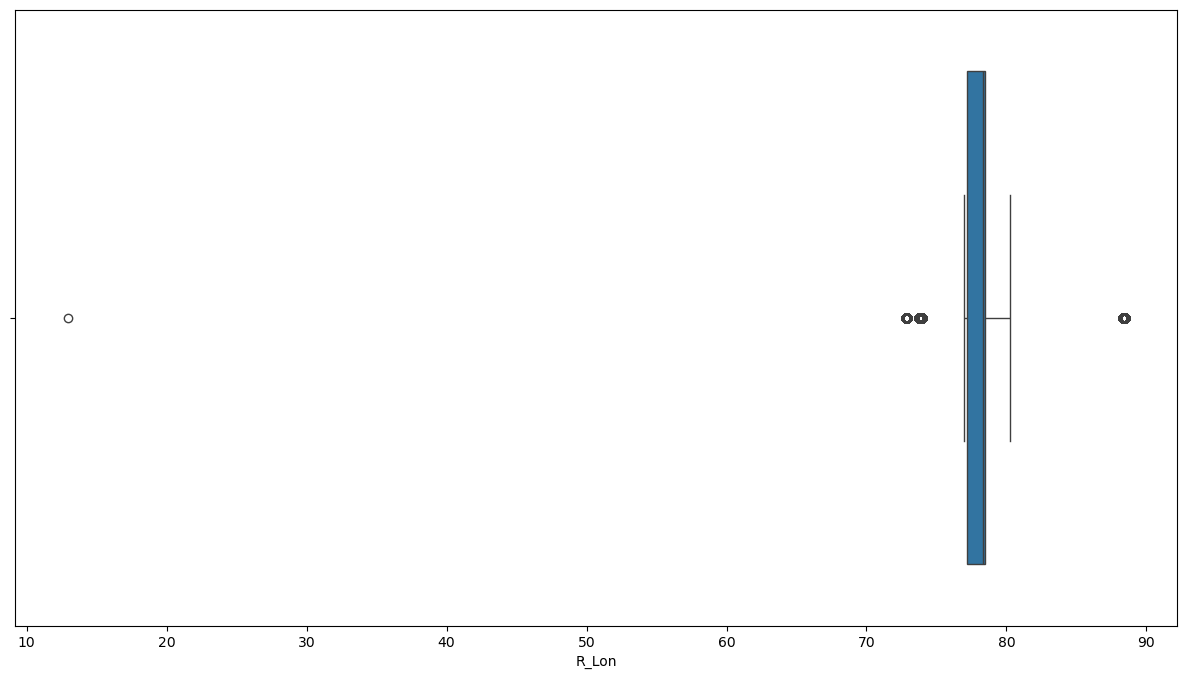

In [730]:
from matplotlib import pyplot
fig, ax = pyplot.subplots(figsize=(15,8))
sns.boxplot(x=df['R_Lon'], ax=ax)

<Axes: xlabel='R_Lat'>

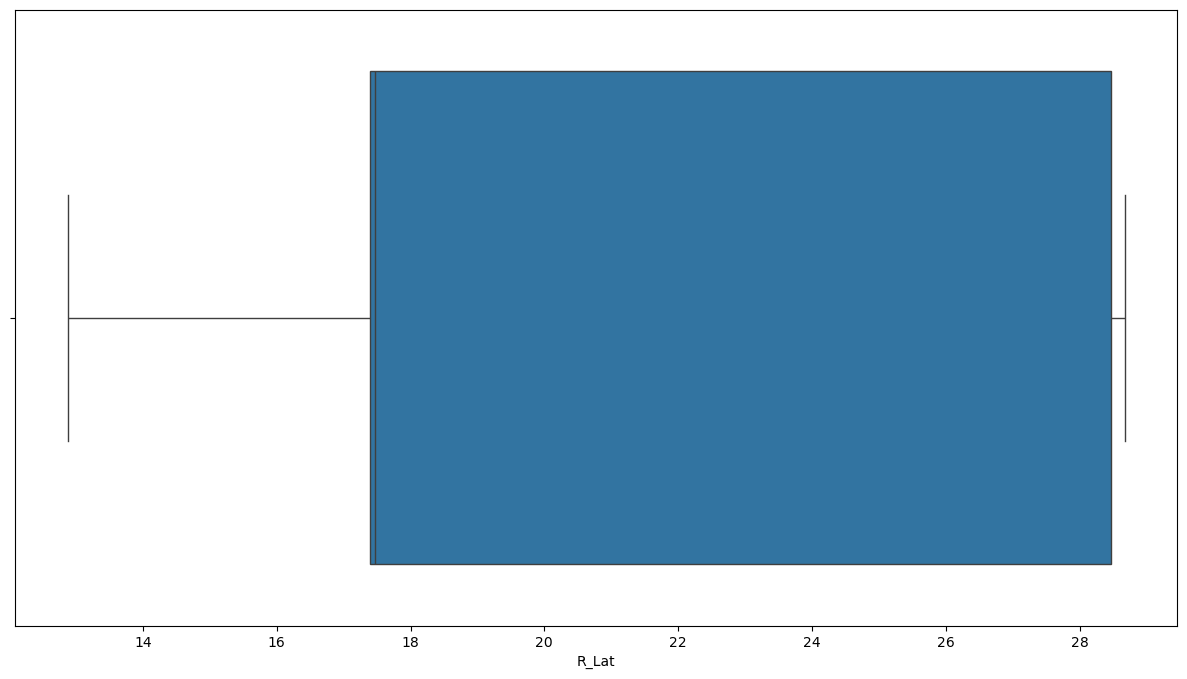

In [731]:
fig, ax = pyplot.subplots(figsize=(15,8))
sns.boxplot(x=df['R_Lat'], ax=ax)

<Axes: xlabel='C_Lon'>

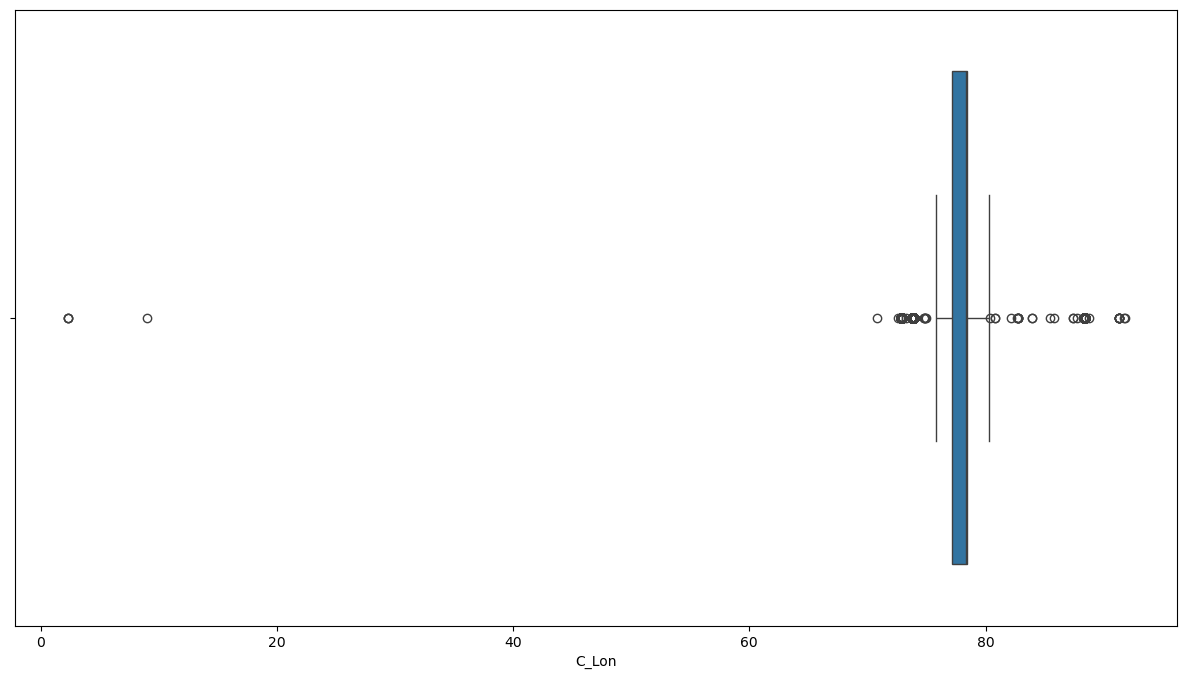

In [732]:
fig, ax = pyplot.subplots(figsize=(15,8))
sns.boxplot(x=df['C_Lon'], ax=ax)

<Axes: xlabel='C_Lat'>

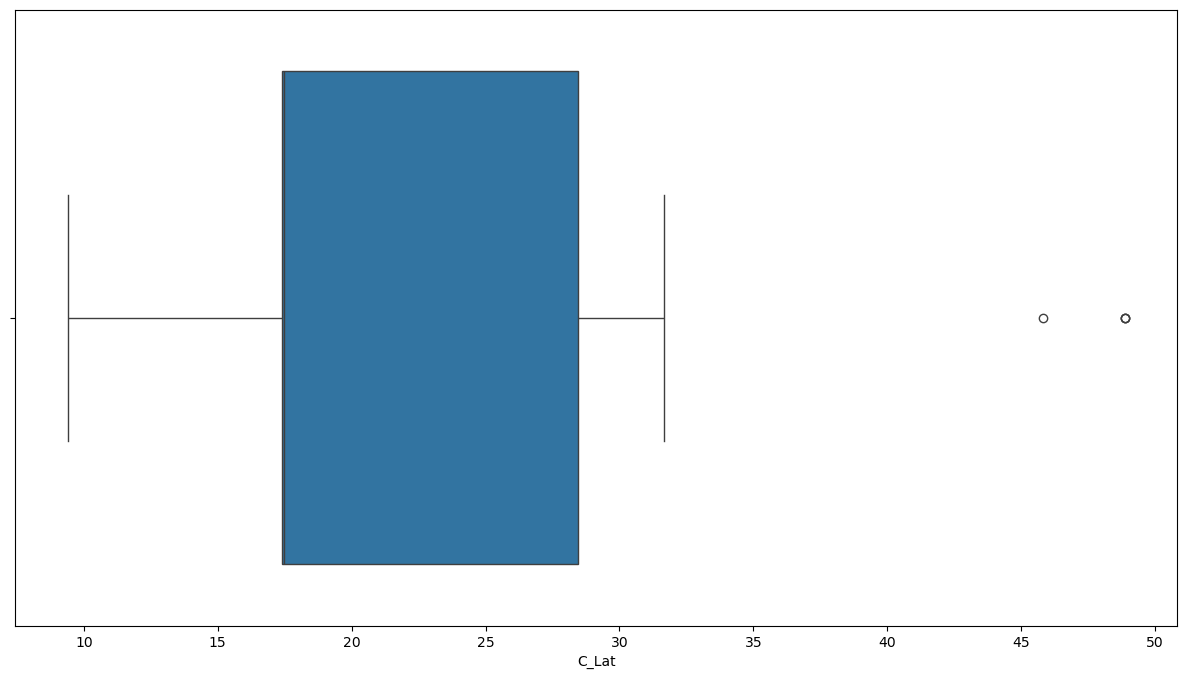

In [733]:
fig, ax = pyplot.subplots(figsize=(15,8))
sns.boxplot(x=df['C_Lat'], ax=ax)

In [734]:
#R_Lon and C_Lon do require outlier treatment

In [735]:
df.head()

,order_id,R_Lon,R_Lat,C_Lon,C_Lat,order_pickedup_time,order_delivered_time,order_pickedup_date,order_delivered_date,dist,diff,order_pick_hour,time_of_day_code
0,PRD_ZMT_2960011,77.063728,28.468983,77.071230,28.449929,2016-04-23 09:30:20,2016-04-23 09:57:04,2016-04-23,2016-04-23,2.24,26.73,9,Night
1,PRD_ZMT_2964555,77.063728,28.468983,77.066637,28.454522,2016-04-23 11:05:32,2016-04-23 11:27:10,2016-04-23,2016-04-23,1.63,21.63,11,Afternoon
2,PRD_ZMT_2968945,77.063728,28.468983,77.067590,28.461570,2016-04-23 14:49:07,2016-04-23 15:07:18,2016-04-23,2016-04-23,0.91,18.18,14,Evening
3,PRD_ZMT_2976663,77.063728,28.468983,77.058401,28.455738,2016-04-23 16:43:14,2016-04-23 17:16:12,2016-04-23,2016-04-23,1.56,32.97,16,Evening
4,PRD_ZMT_2985948,77.063728,28.468983,77.083967,28.440068,2016-04-24 07:54:14,2016-04-24 08:16:29,2016-04-24,2016-04-24,3.78,22.25,7,Morning


In [736]:
columns_to_delete = ['order_id', 'order_pickedup_time', 'order_delivered_time', 
                     'order_pickedup_date', 'order_delivered_date']

# Drop the specified columns
df = df.drop(columns=columns_to_delete)

In [737]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237373 entries, 0 to 237372
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   R_Lon             237373 non-null  float64
 1   R_Lat             237373 non-null  float64
 2   C_Lon             237373 non-null  float64
 3   C_Lat             237373 non-null  float64
 4   dist              237373 non-null  float64
 5   diff              237373 non-null  float64
 6   order_pick_hour   237373 non-null  int32  
 7   time_of_day_code  237373 non-null  object 
dtypes: float64(6), int32(1), object(1)
memory usage: 13.6+ MB


In [738]:
df.head()

,R_Lon,R_Lat,C_Lon,C_Lat,dist,diff,order_pick_hour,time_of_day_code
0,77.063728,28.468983,77.071230,28.449929,2.24,26.73,9,Night
1,77.063728,28.468983,77.066637,28.454522,1.63,21.63,11,Afternoon
2,77.063728,28.468983,77.067590,28.461570,0.91,18.18,14,Evening
3,77.063728,28.468983,77.058401,28.455738,1.56,32.97,16,Evening
4,77.063728,28.468983,77.083967,28.440068,3.78,22.25,7,Morning


In [739]:
columns_to_delete = ['time_of_day_code']

# Drop the specified columns
df1 = df.drop(columns=columns_to_delete)

<Axes: >

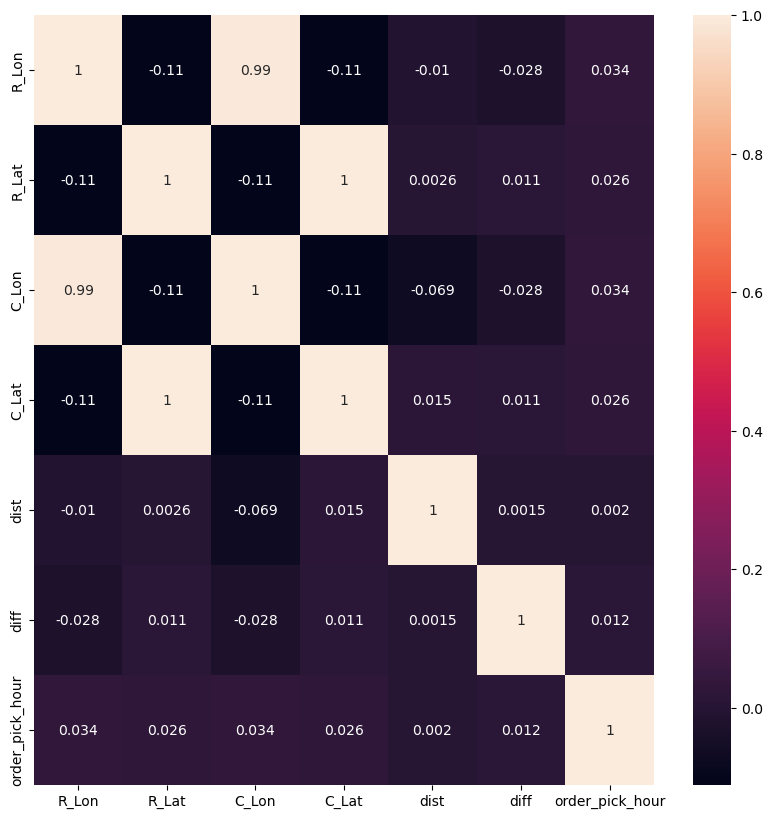

In [740]:
#Bivariate analysis

#Heatmap


fig, ax = plt.subplots(figsize=(10, 10))
Var_Corr = df1.corr(method = 'pearson')

sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True, ax=ax)


<Axes: >

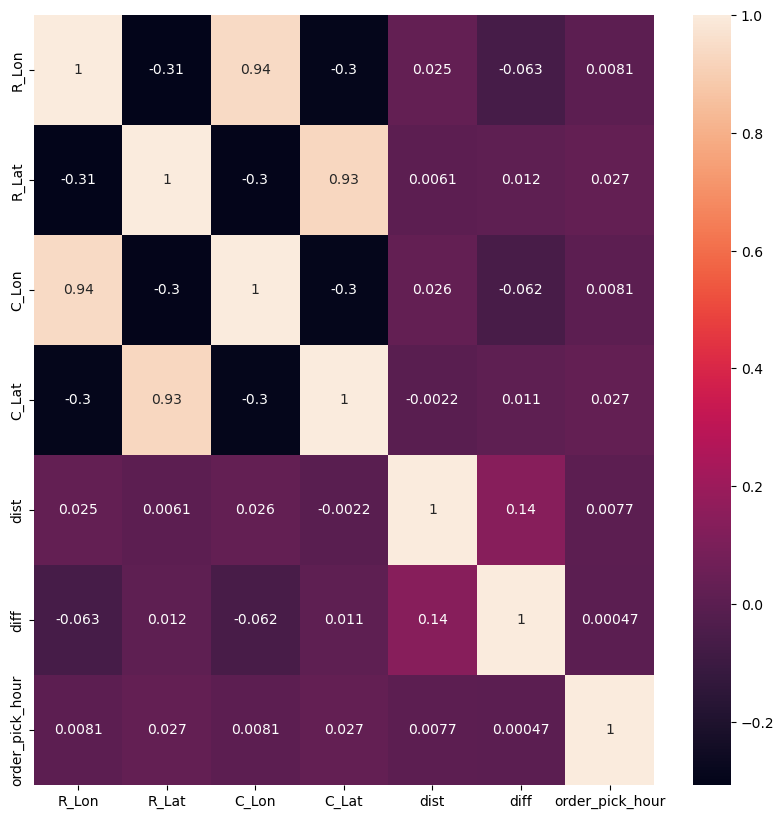

In [741]:
fig, ax = plt.subplots(figsize=(10, 10))
Var_Corr = df1.corr(method = 'kendall')

sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True, ax=ax)


<Axes: >

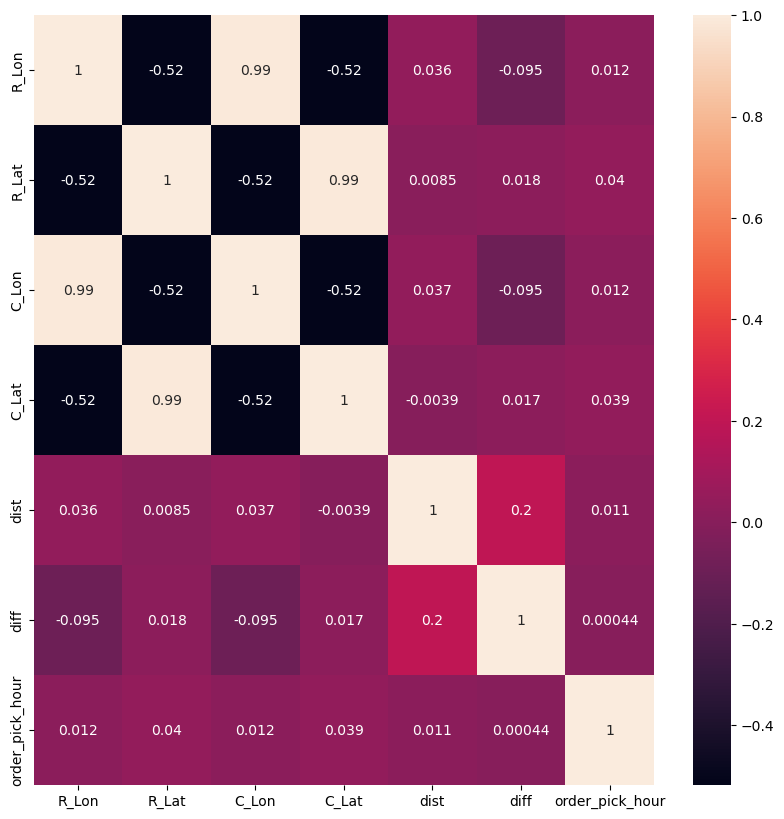

In [742]:
fig, ax = plt.subplots(figsize=(10, 10))
Var_Corr = df1.corr(method = 'spearman')
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True, ax=ax)

In [743]:
#We see a weak correaltion between dist and diff which is fine as distance between points and time to deliver is correalted

In [744]:
#Outlier treatment

<Axes: >

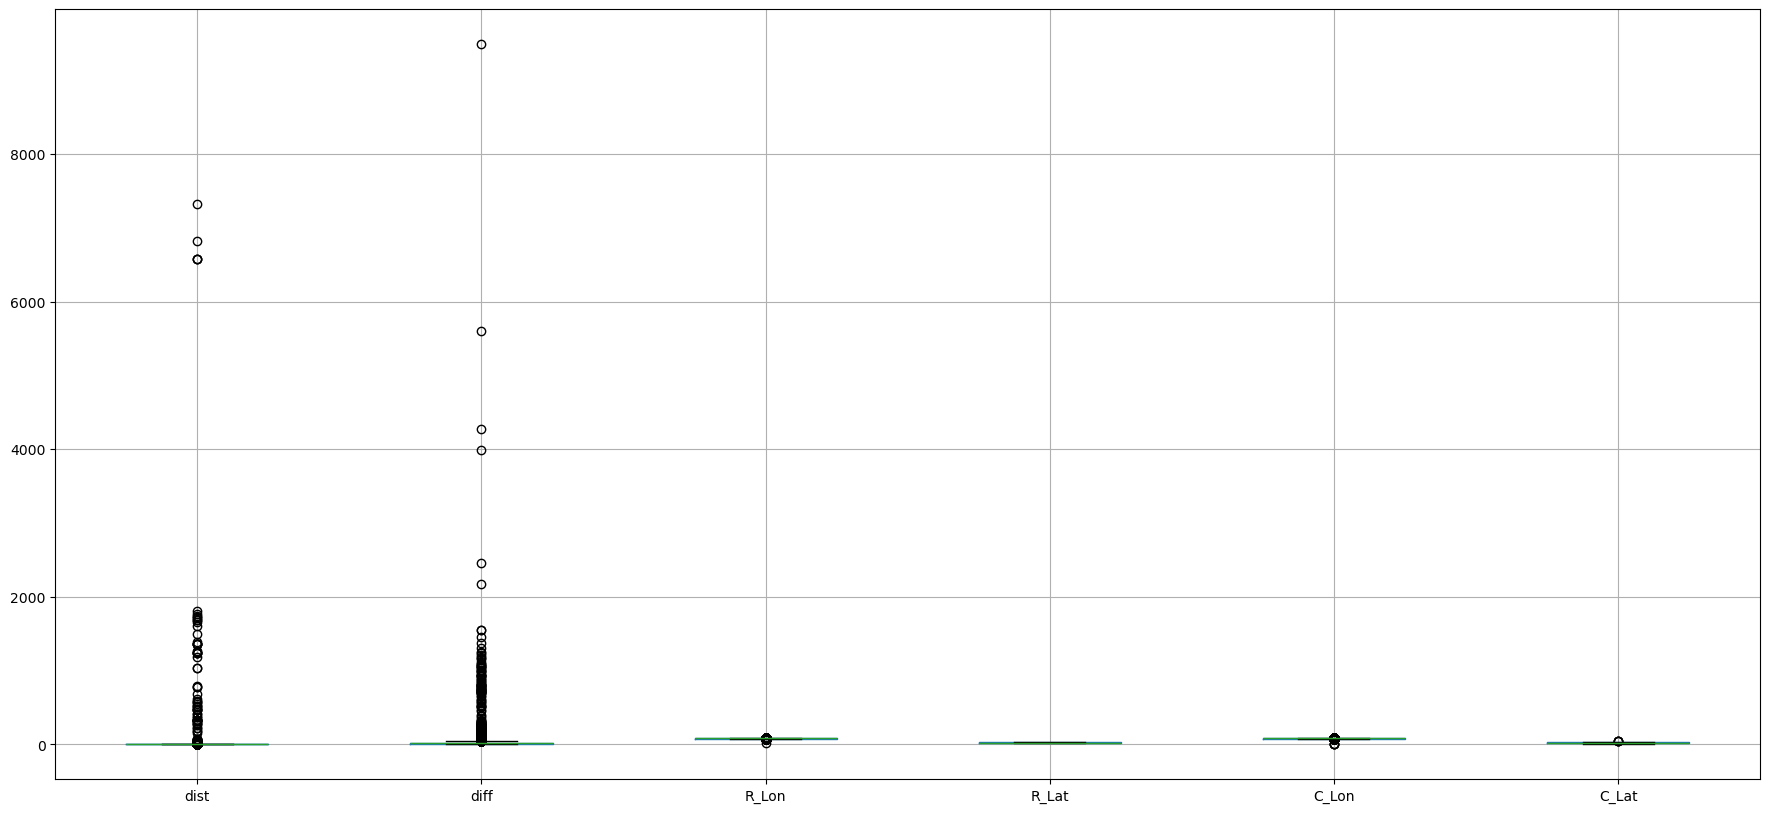

In [745]:
#Variables we need to check for outlier detection
num_cols = ['dist', 'diff', 'R_Lon', 'R_Lat', 'C_Lon', 'C_Lat']

df[num_cols].boxplot(figsize=(22,10))

In [746]:
#wer do on dist, diff, R_Lon, C_Lon

In [747]:
num_cols1 = ['dist', 'diff', 'R_Lon',  'C_Lon']

In [748]:
def remove_outliers(df, num_cols1):
    Q1 = df[num_cols1].quantile(0.25)
    Q3 = df[num_cols1].quantile(0.75)
    
    IQR = Q3 - Q1
    
    for i in num_cols1:
        Q1ss = df[i].quantile(0.25)
        Q3ss = df[i].quantile(0.75)
        IQRss = Q3ss - Q1ss
        df = df[ ~ ((df[i] < (Q1ss -  1.5 * IQRss)) | (df[i] > (Q3ss + 1.5 * IQRss))) ]

    return df
    

In [749]:
df= remove_outliers(df, num_cols1)

<Axes: >

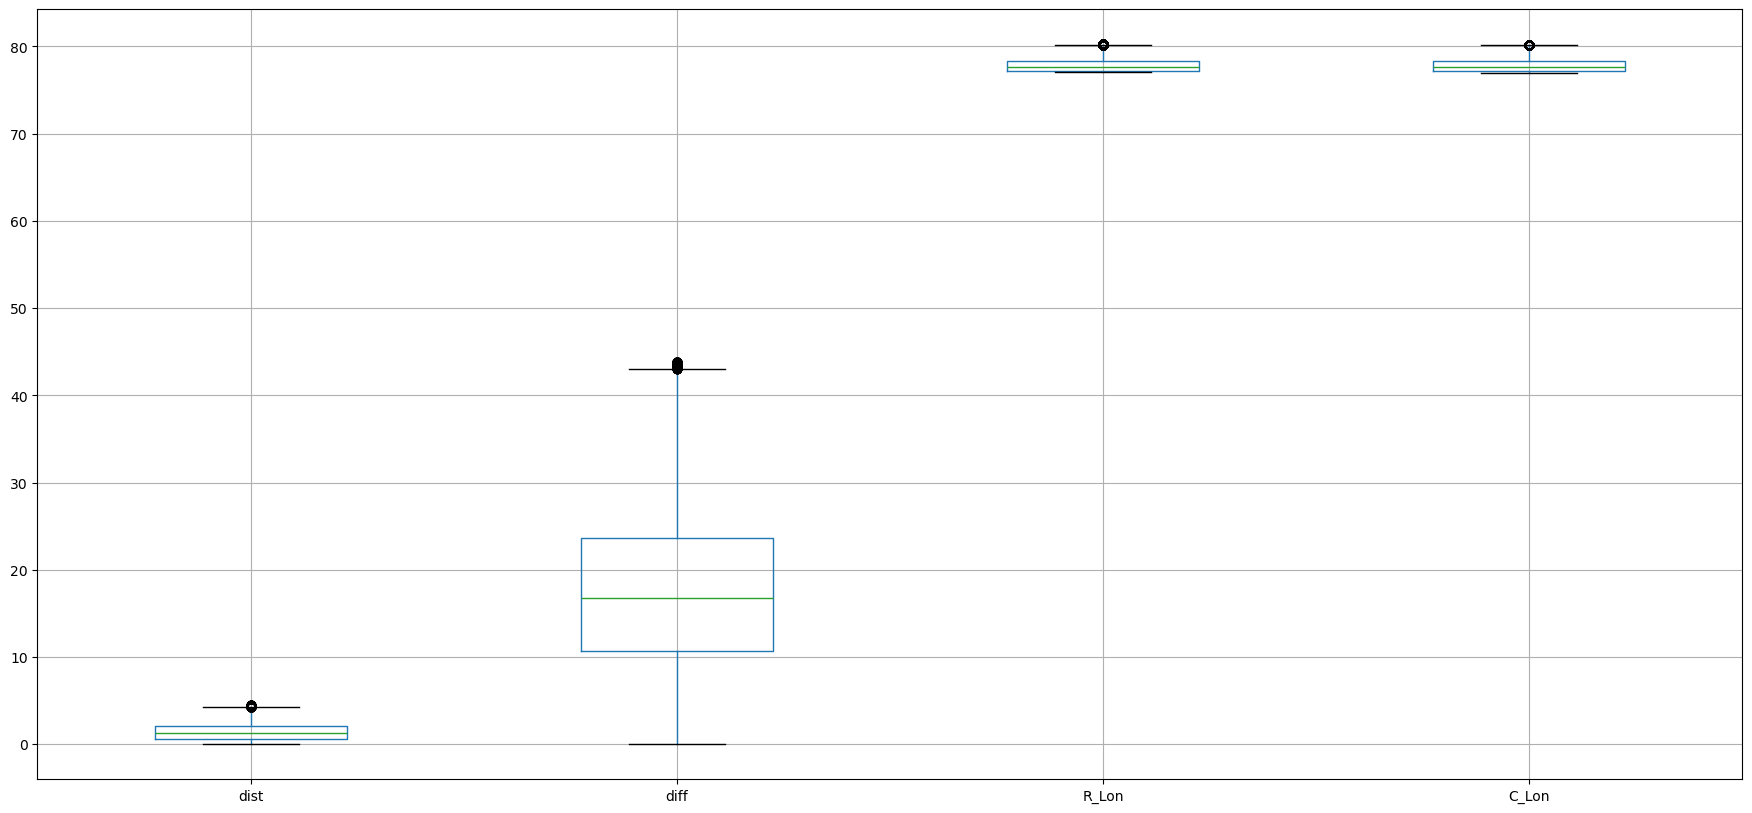

In [750]:
df[num_cols1].boxplot(figsize=(22,10))

In [751]:
#much better

In [752]:
num_cols1 = ['dist', 'diff', 'R_Lon',  'C_Lon', 'R_Lat', 'C_Lat']

In [753]:
df= remove_outliers(df, num_cols1)

<Axes: >

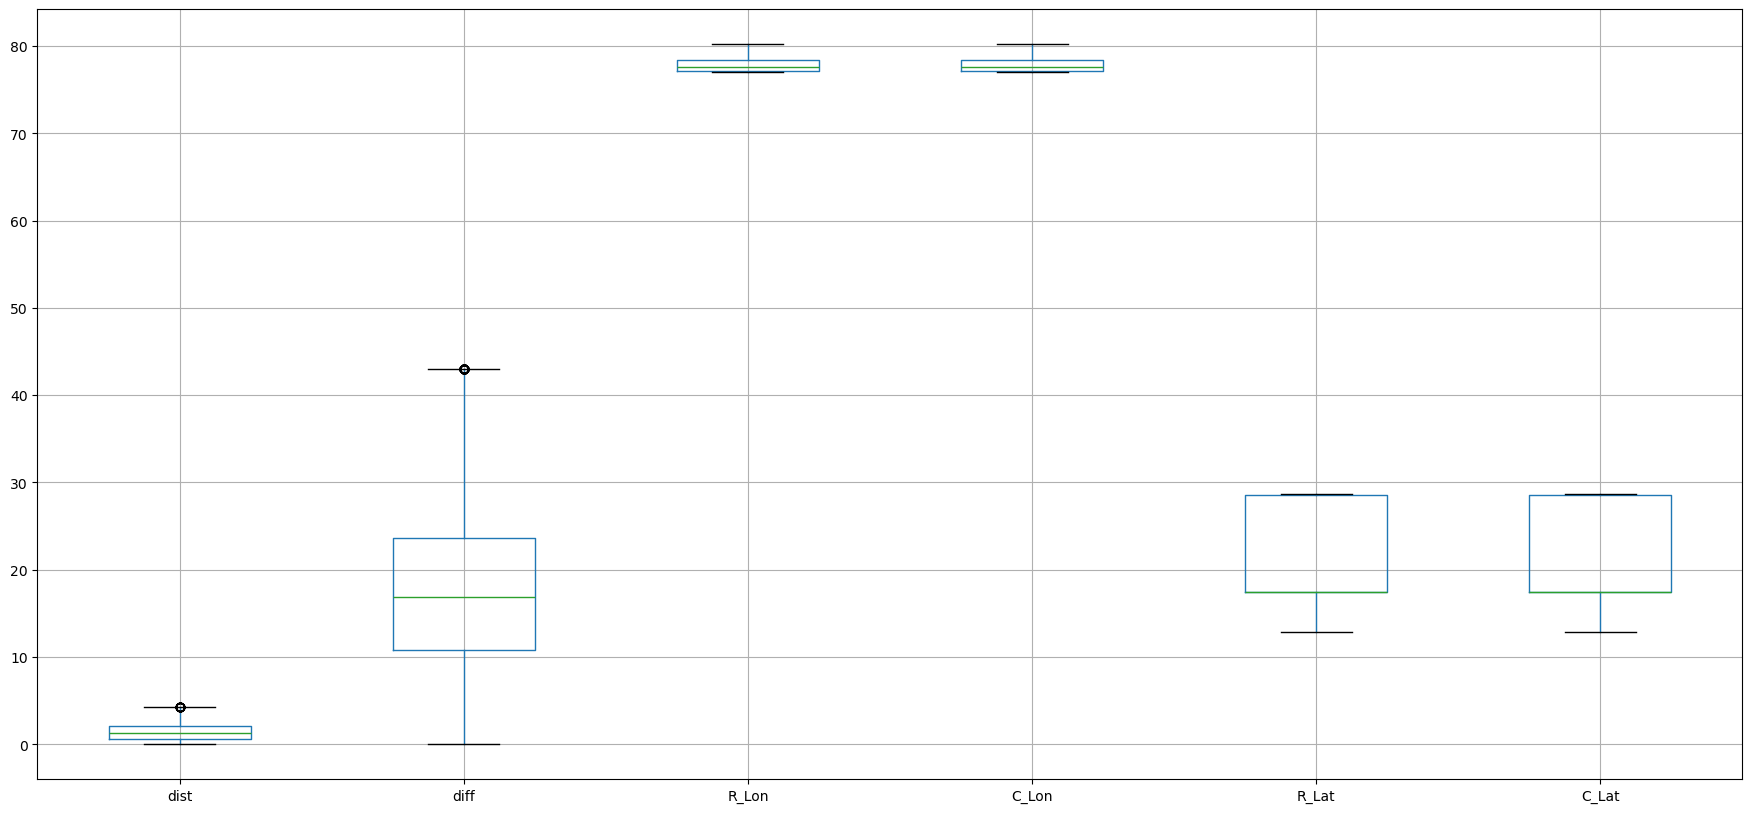

In [754]:
df[num_cols1].boxplot(figsize=(22,10))

In [755]:
df.describe()

,R_Lon,R_Lat,C_Lon,C_Lat,dist,diff,order_pick_hour
count,161671.000000,161671.000000,161671.000000,161671.000000,161671.000000,161671.000000,161671.000000
mean,77.718464,21.821396,77.718435,21.820439,1.405039,17.358354,11.909198
std,0.577601,6.307089,0.576543,6.306239,0.965275,9.759802,3.570564
min,77.026638,12.875971,77.007046,12.858032,0.000000,0.000000,0.000000
25%,77.156708,17.433633,77.169298,17.433163,0.620000,10.780000,8.000000
50%,77.625473,17.468478,77.633029,17.468677,1.290000,16.830000,13.000000
75%,78.379158,28.532567,78.375906,28.527319,2.090000,23.650000,15.000000
max,80.201960,28.671119,80.183832,28.703822,4.300000,43.050000,19.000000


In [756]:
#Lets plot the points now to see how many clusters we get for each

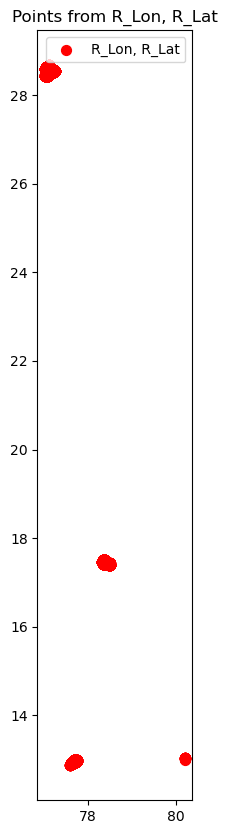

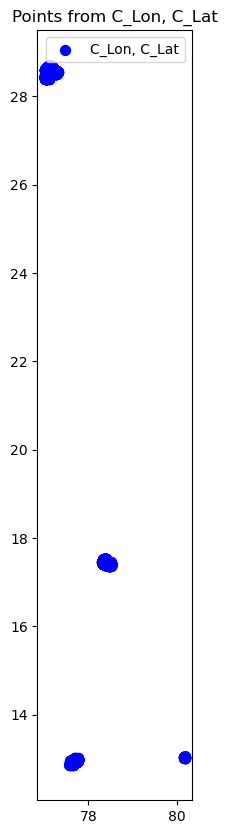

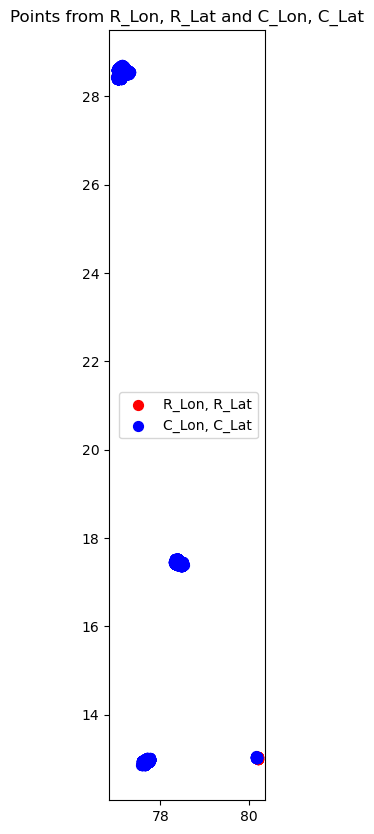

In [757]:
# Create GeoDataFrame for R_Lon, R_Lat
geometry_R = [Point(xy) for xy in zip(df['R_Lon'], df['R_Lat'])]
gdf_R = gpd.GeoDataFrame(df, geometry=geometry_R)

# Create GeoDataFrame for C_Lon, C_Lat
geometry_C = [Point(xy) for xy in zip(df['C_Lon'], df['C_Lat'])]
gdf_C = gpd.GeoDataFrame(df, geometry=geometry_C)

# Plotting R_Lon, R_Lat separately
fig, ax = plt.subplots(figsize=(10, 10))
gdf_R.plot(ax=ax, color='red', label='R_Lon, R_Lat', markersize=50)
plt.title('Points from R_Lon, R_Lat')
plt.legend()
plt.show()

# Plotting C_Lon, C_Lat separately
fig, ax = plt.subplots(figsize=(10, 10))
gdf_C.plot(ax=ax, color='blue', label='C_Lon, C_Lat', markersize=50)
plt.title('Points from C_Lon, C_Lat')
plt.legend()
plt.show()

# Plotting both on one map
fig, ax = plt.subplots(figsize=(10, 10))
gdf_R.plot(ax=ax, color='red', label='R_Lon, R_Lat', markersize=50)
gdf_C.plot(ax=ax, color='blue', label='C_Lon, C_Lat', markersize=50)
plt.title('Points from R_Lon, R_Lat and C_Lon, C_Lat')
plt.legend()
plt.show()

In [758]:
#4 clear clusters for each set of points from R and C respectively

In [770]:
from sklearn.cluster import KMeans

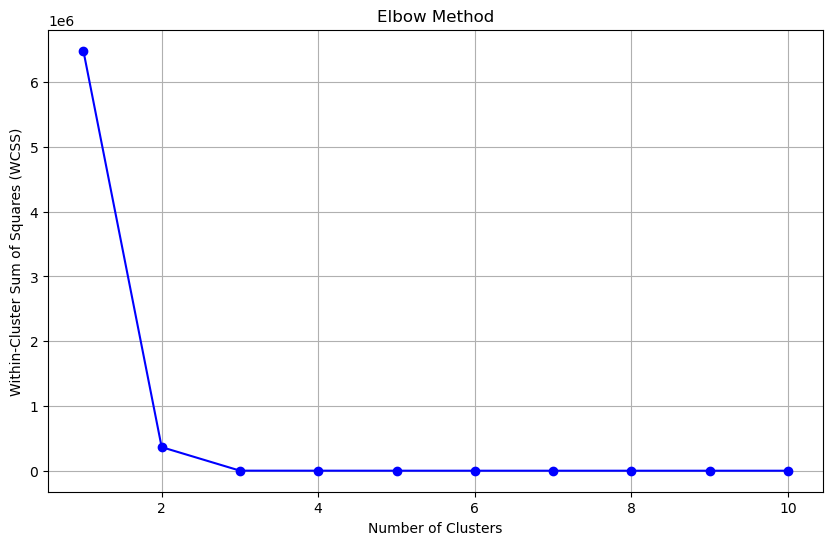

In [792]:
# Assuming df is your DataFrame with features R_Lon and R_Lat
X = df[['R_Lon', 'R_Lat']]

# Store the WCSS values for different numbers of clusters
wcss = []

# Try different numbers of clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    # Append the within-cluster sum of squares to the list
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

In [793]:
# Initialize KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, init = 'k-means++', random_state=42)


In [794]:
# Fit KMeans model
kmeans.fit(df[['R_Lon', 'R_Lat']])

KMeans(n_clusters=3, random_state=42)

In [795]:
# Get cluster labels
cluster_labels = kmeans.labels_

In [796]:
# Map cluster labels to cluster names
cluster_names = {0: 'A', 1: 'B', 2: 'C'}
df['cluster_R'] = cluster_labels
df['cluster_R'] = df['cluster_R'].map(cluster_names)

In [797]:
#Now for C points as well

In [798]:
# Fit KMeans model
kmeans.fit(df[['C_Lon', 'C_Lat']])

KMeans(n_clusters=3, random_state=42)

In [799]:
# Get cluster labels
cluster_labels = kmeans.labels_

In [800]:
# Map cluster labels to cluster names
cluster_names = {0: 'E', 1: 'F', 2: 'G'}
df['cluster_C'] = cluster_labels
df['cluster_C'] = df['cluster_C'].map(cluster_names)

In [801]:
df.head()

,R_Lon,R_Lat,C_Lon,C_Lat,dist,diff,order_pick_hour,time_of_day_code,cluster_R,cluster_C
0,77.063728,28.468983,77.071230,28.449929,2.24,26.73,9,Night,B,F
1,77.063728,28.468983,77.066637,28.454522,1.63,21.63,11,Afternoon,B,F
2,77.063728,28.468983,77.067590,28.461570,0.91,18.18,14,Evening,B,F
3,77.063728,28.468983,77.058401,28.455738,1.56,32.97,16,Evening,B,F
4,77.063728,28.468983,77.083967,28.440068,3.78,22.25,7,Morning,B,F


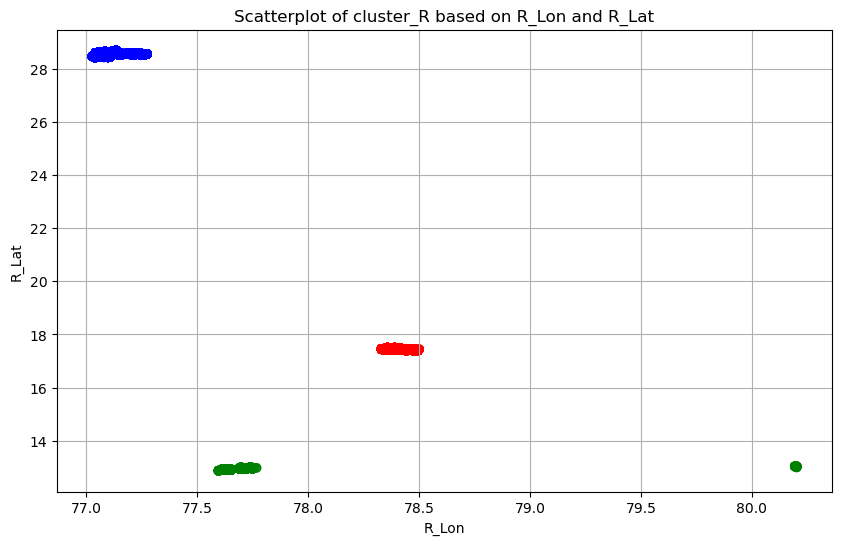

In [802]:
# Assuming df is your DataFrame
# Plot the scatterplot
plt.figure(figsize=(10, 6))
colors = {'A': 'red', 'B': 'blue', 'C': 'green', }  # Define colors for each cluster
plt.scatter(df['R_Lon'], df['R_Lat'], c=df['cluster_R'].map(colors), alpha=0.5)
plt.xlabel('R_Lon')
plt.ylabel('R_Lat')
plt.title('Scatterplot of cluster_R based on R_Lon and R_Lat')
plt.grid(True)
plt.show()

In [803]:
# Group by 'cluster_R' and calculate the count and mean
cluster_R_stats = df.groupby('cluster_R').agg({'R_Lon': 'mean', 'R_Lat': 'mean', 'C_Lon': 'count'}).reset_index()
cluster_R_stats.rename(columns={'C_Lon': 'count'}, inplace=True)

print(cluster_R_stats)

  cluster_R      R_Lon      R_Lat  count
0         A  78.393603  17.444928  63938
1         B  77.147372  28.523567  73650
2         C  77.672532  12.944086  24083


In [804]:
# Group by 'cluster_C' and calculate the count and mean
cluster_C_stats = df.groupby('cluster_C').agg({'C_Lon': 'mean', 'C_Lat': 'mean', 'R_Lon': 'count'}).reset_index()
cluster_C_stats.rename(columns={'R_Lon': 'count'}, inplace=True)

print(cluster_C_stats)

  cluster_C      C_Lon      C_Lat  count
0         E  78.392246  17.444808  63938
1         F  77.148442  28.521641  73650
2         G  77.672670  12.943868  24083


In [805]:
#Almost similar clusters 

In [806]:
columns_to_delete = ['R_Lon','R_Lat','C_Lon','C_Lat']

# Drop the specified columns
df = df.drop(columns=columns_to_delete)

In [807]:
df.head()

,dist,diff,order_pick_hour,time_of_day_code,cluster_R,cluster_C
0,2.24,26.73,9,Night,B,F
1,1.63,21.63,11,Afternoon,B,F
2,0.91,18.18,14,Evening,B,F
3,1.56,32.97,16,Evening,B,F
4,3.78,22.25,7,Morning,B,F


In [808]:
# variables. I delete them
X = df.drop(['diff'], axis=1)
y = df['diff']

In [809]:
#Encoding, Outlier detection and treatment remaining 

from sklearn.model_selection import train_test_split

#Train imputer on train and then apply on cv and test
X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25, random_state=42)

In [810]:
from category_encoders import TargetEncoder

# Data is already trained on the tarining dataset
# This function is used to do the transformation on the training, testing and validationd dataset 
def target_encode(x,var_list, encoder):
    
    for i in range(0, len(var_list)):
        x[var_list[i]] = encoder.transform(x[var_list[i]])

In [811]:
encoder = TargetEncoder()

In [812]:
encoder.fit(X_train['time_of_day_code'], y_train)

TargetEncoder(cols=['time_of_day_code'])

In [813]:
target_encode(X_train, ['time_of_day_code'], encoder)
target_encode(X_val, ['time_of_day_code'], encoder)
target_encode(X_test, ['time_of_day_code'], encoder)

In [814]:
encoder.fit(X_train['cluster_C'], y_train)

TargetEncoder(cols=['cluster_C'])

In [815]:
target_encode(X_train, ['cluster_C'], encoder)
target_encode(X_val, ['cluster_C'], encoder)
target_encode(X_test, ['cluster_C'], encoder)

In [816]:
encoder.fit(X_train['cluster_R'], y_train)

TargetEncoder(cols=['cluster_R'])

In [817]:
target_encode(X_train, ['cluster_R'], encoder)
target_encode(X_val, ['cluster_R'], encoder)
target_encode(X_test, ['cluster_R'], encoder)

In [818]:
X_train.head()

,dist,order_pick_hour,time_of_day_code,cluster_R,cluster_C
103678,1.69,14,17.892709,16.846414,16.846414
120651,0.19,15,17.892709,17.528258,17.528258
31807,1.76,12,17.487747,16.846414,16.846414
236503,0.00,14,17.892709,18.142223,18.142223
15476,1.33,9,16.301017,16.846414,16.846414


In [819]:
y_train.head()

103678    20.77
120651    25.45
31807     21.00
236503    32.77
15476     22.75
Name: diff, dtype: float64

In [820]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import matplotlib.pyplot as plt


In [823]:
# Define a range of hyperparameters to tune
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200]
}

# Perform grid search with cross-validation to select the best hyperparameters on the validation set
regressor = xgb.XGBRegressor(objective='reg:squarederror')
grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_val, y_val)
best_params = grid_search.best_params_

# Train XGBoost regressor with the best hyperparameters on the training set
best_regressor = xgb.XGBRegressor(**best_params)
best_regressor.fit(X_train, y_train)

# Predict on the test set
y_test_pred = best_regressor.predict(X_test)

# Calculate evaluation metrics
mse_test = mean_squared_error(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Test Mean Squared Error:", mse_test)
print("Test R-squared:", r2_test)



Test Mean Squared Error: 89.51832074900835
Test R-squared: 0.052821306242617494
Test MAPE error: 2513451904466886.0


[0.54665977 0.11064602 0.1902408  0.15245335 0.        ]


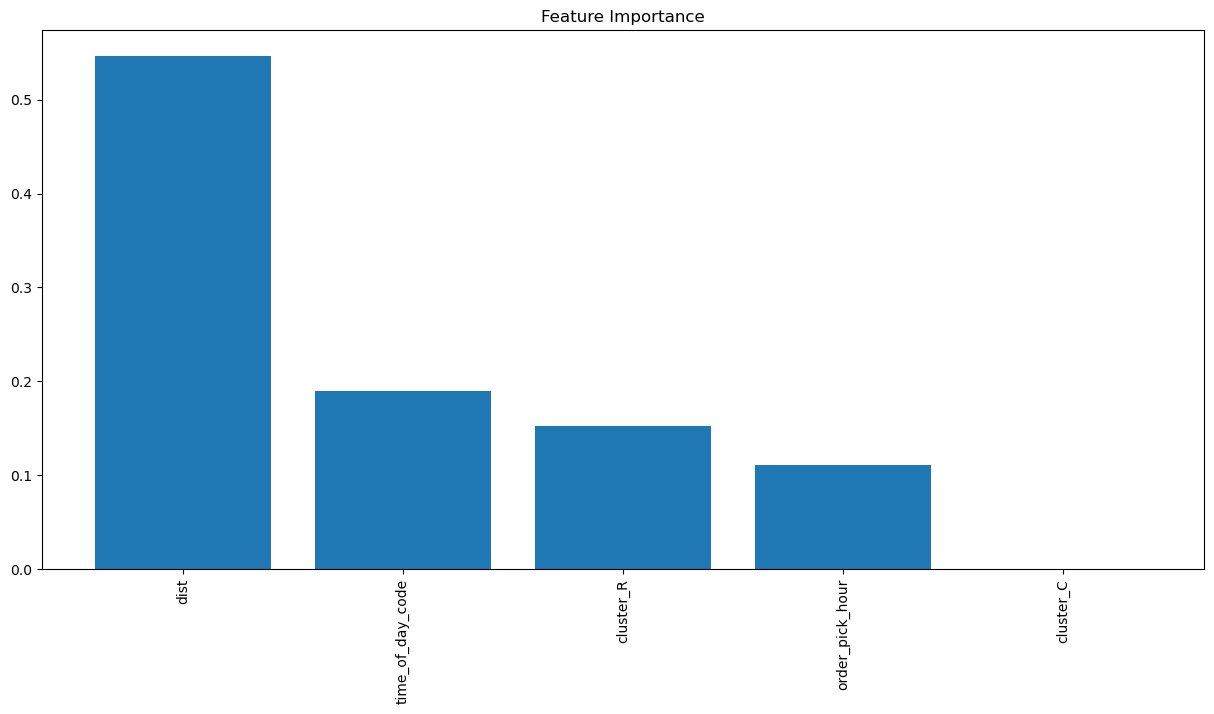

In [822]:
print(best_regressor.feature_importances_)

importances = best_regressor.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending or
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they mat
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-ax
plt.show() # Show plot

0
1
2
3
4
